In [1]:
'''
Principal component analysis (PCA) is the process of computing the principal components then using 
them to perform a change of basis on the data. In other words, PCA is an unsupervised learning 
dimensionality reduction technique. 

It’s useful to reduce the dimensionality of a dataset for two main reasons: 

- When there are too many dimensions in a dataset to visualize 
- To identify the most predictive n dimensions for feature selection when building a predictive model. 

'''

'\nPrincipal component analysis (PCA) is the process of computing the principal components then using \nthem to perform a change of basis on the data. In other words, PCA is an unsupervised learning \ndimensionality reduction technique. \n\nIt’s useful to reduce the dimensionality of a dataset for two main reasons: \n\n- When there are too many dimensions in a dataset to visualize \n- To identify the most predictive n dimensions for feature selection when building a predictive model. \n\n'

In [12]:
# PCA algorithm in Python on the Iris dataset and then visualize it using matplotlib. 
from sklearn.datasets import load_iris # Dataset
from sklearn.decomposition import PCA # Algorithm
import matplotlib.pyplot as plt # Visualization

# Load the data 
iris_data = load_iris(as_frame=True)

# Preview
iris_data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


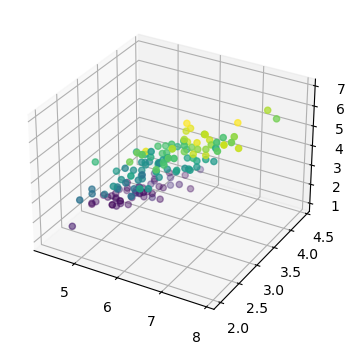

In [13]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sepal_length = iris_data.data["sepal length (cm)"]
sepal_width = iris_data.data["sepal width (cm)"]
petal_length = iris_data.data["petal length (cm)"]
petal_width = iris_data.data["petal width (cm)"]

ax.scatter(sepal_length, sepal_width, petal_length, c=petal_width)
plt.show()

In [14]:
'''
It’s quite difficult to get insights from this visualization because all of the inststances are 
jumbled together since we only have access to one viewpoint when we visualize data in three dimensions 
in this scenario.  

With PCA, we can reduce the dimensions of the data down to two, which would then make it easier to 
visualize our data and tell apart the classes. 
'''
# Instantiate PCA with 2 components
pca = PCA(n_components=2)   #Model

In [15]:
# Train the model 
pca.fit(iris_data.data)
iris_data_reduced = pca.fit_transform(iris_data.data)

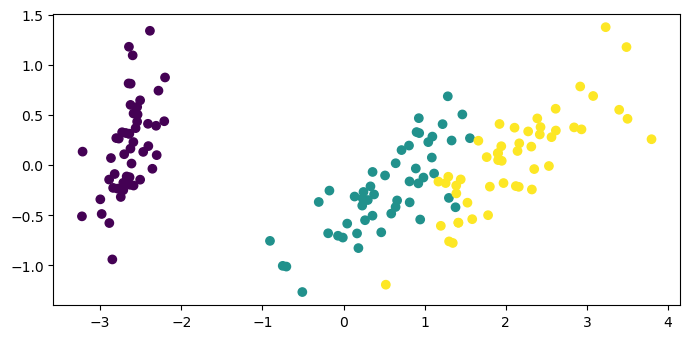

In [16]:
# Plot data
plt.scatter(
    iris_data_reduced[:,0],
    iris_data_reduced[:,1],
    c=iris_data.target
)
plt.show()

In [17]:
'''
In the code above, we transform the iris dataset features, only keeping two components, and then 
plot the reduced data in a two-dimensional plane.  

Now, it’s much easier for us to gather information about the data and how the classes are separated. 
We can use this insight to decide on the next steps to take if we were to fit a machine learning model onto our data. 
'''
#!pip install --upgrade scikit-learn
#The explained variance ratio is the proportion of total variance each component explains.
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.92461872 0.05306648]


In [18]:
'''
 Dimensionality Reduction using PCA (Digits Dataset)
Use Case: Reduce feature space while preserving important patterns.

'''
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data
#X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

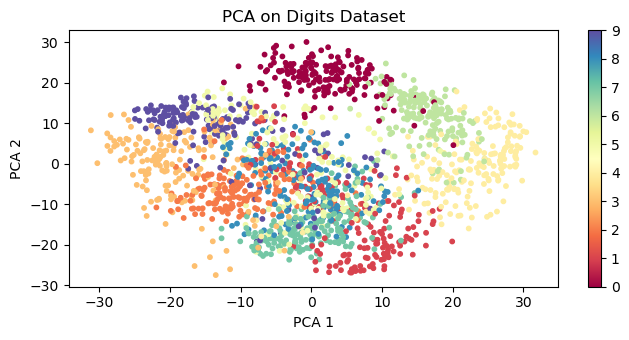

In [20]:
# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='Spectral', s=10)
plt.colorbar()
plt.title('PCA on Digits Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [21]:
#The explained variance ratio is the proportion of total variance each component explains.
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.14890594 0.13618771]


In [22]:
#Wine Classification
#Reduce the number of features in the Wine dataset using PCA and classify wine types using 
#Logistic Regression.
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
# Step 2: Load dataset
dataset = pd.read_csv('D:\\Downloads\\winedataset\\wine.csv')  # Replace with actual path
X = dataset.iloc[:, :-1].values    # Features
y = dataset.iloc[:, -1].values     # Labels
#dataset.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Step 4: Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Step 5: Apply PCA
pca = PCA(n_components=2) #Model
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.40840297 0.16864436]


In [30]:
# Step 6: Train Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [31]:
# Step 7: Predict and evaluate
y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


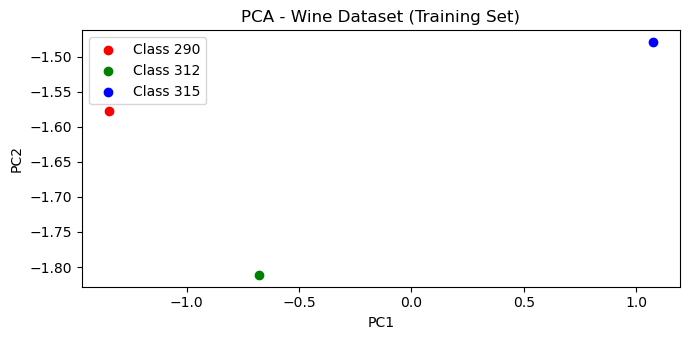

In [32]:
# Step 8: Visualize results
colors = ['red', 'green', 'blue']
for i, color in zip(np.unique(y_train), colors):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=f'Class {i}', color=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Wine Dataset (Training Set)')
plt.legend()
plt.show()